[*********************100%***********************]  1 of 1 completed


C:\Users\mehdi\AppData\Local\Temp\ipykernel_9620\3446622099.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Portfolio_Value'] = portfolio_value
C:\Users\mehdi\AppData\Local\Temp\ipykernel_9620\3446622099.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Strategy_Returns'] = data['Portfolio_Value'].pct_change() + 1
C:\Users\mehdi\AppData\Local\Temp\ipykernel_9620\3446622099.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

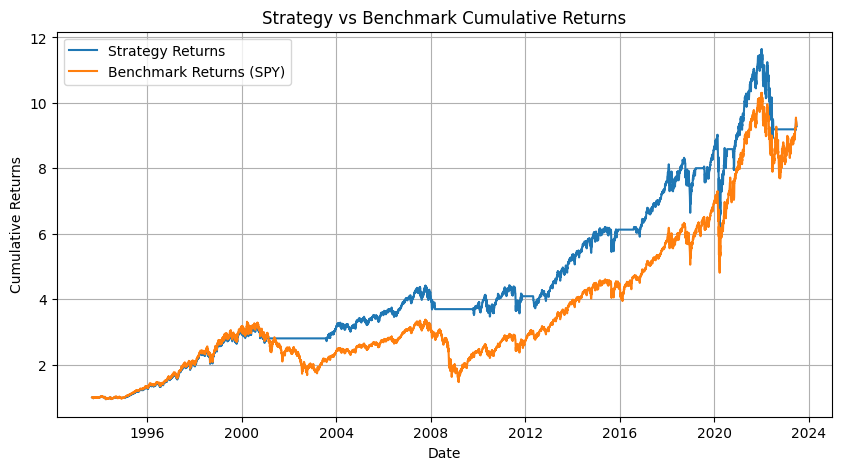

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Get historical data
data = yf.download('SPY')

# Calculate the 150-day moving average
data['MA_150'] = data['Close'].rolling(window=150).mean()

# Calculate the slope of the 150-day moving average
slopes = []
for i in range(149, len(data)):
    y = data['MA_150'].iloc[i-149:i+1].dropna().values.reshape(-1, 1)
    x = np.array(range(len(y))).reshape(-1, 1)
    if len(y) > 1:
        reg = LinearRegression().fit(x, y)
        slopes.append(reg.coef_[0][0])
    else:
        slopes.append(np.nan)

# Update the DataFrame explicitly to avoid SettingWithCopyWarning
data.loc[data.index[149:], 'MA_slope'] = slopes

# Implement the strategy
capital = 100000
cash = capital
position = 0
portfolio_value = []

for i in range(150, len(data)):
    if data['MA_slope'].iloc[i-1] > 0:
        # Buy SPY with all available cash
        position += cash / data['Close'].iloc[i]
        cash = 0
    elif data['MA_slope'].iloc[i-1] < 0 and position > 0:
        # Sell all positions and hold cash
        cash += position * data['Close'].iloc[i]
        position = 0
    portfolio_value.append(cash + position * data['Close'].iloc[i])

# Add the portfolio value to the DataFrame
data = data.iloc[150:]
data['Portfolio_Value'] = portfolio_value

# Calculate and plot the returns
data['Strategy_Returns'] = data['Portfolio_Value'].pct_change() + 1
data['Benchmark_Returns'] = data['Close'].pct_change() + 1

cumulative_strategy_returns = data['Strategy_Returns'].cumprod()
cumulative_benchmark_returns = data['Benchmark_Returns'].cumprod()

plt.figure(figsize=(10, 5))
plt.plot(data.index, cumulative_strategy_returns, label='Strategy Returns')
plt.plot(data.index, cumulative_benchmark_returns, label='Benchmark Returns (SPY)')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.title('Strategy vs Benchmark Cumulative Returns')
plt.grid()
plt.show()


[*********************100%***********************]  1 of 1 completed


C:\Users\mehdi\AppData\Local\Temp\ipykernel_9620\4257911148.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Portfolio_Value'] = portfolio_value
C:\Users\mehdi\AppData\Local\Temp\ipykernel_9620\4257911148.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Strategy_Returns'] = data['Portfolio_Value'].pct_change() + 1
C:\Users\mehdi\AppData\Local\Temp\ipykernel_9620\4257911148.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

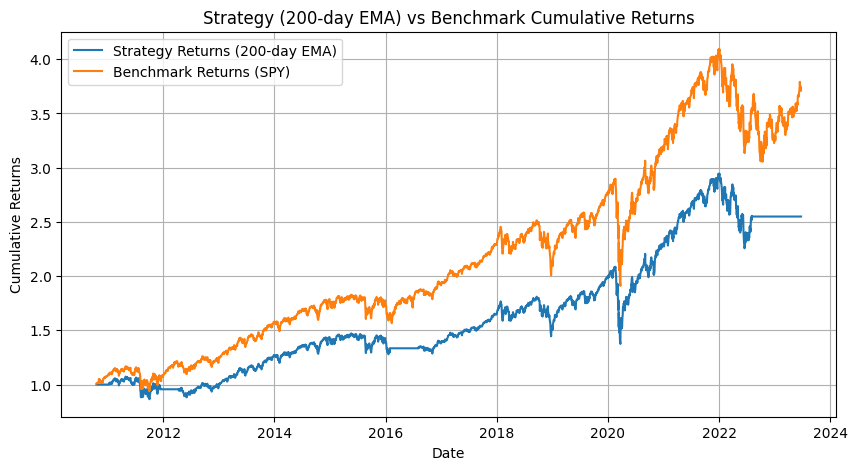

In [15]:
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Get historical data
data = yf.download('SPY', start='2010-01-01', end='2023-06-26')

# Calculate the 200-day exponential moving average
data['EMA_200'] = data['Close'].ewm(span=200).mean()

# Calculate the slope of the 200-day exponential moving average
slopes = []
for i in range(199, len(data)):
    y = data['EMA_200'].iloc[i-199:i+1].values.reshape(-1, 1)
    x = np.array(range(200)).reshape(-1, 1)
    reg = LinearRegression().fit(x, y)
    slopes.append(reg.coef_[0][0])
data.loc[data.index[199:], 'EMA_slope'] = slopes

# Implement the strategy
capital = 100000
cash = capital
position = 0
portfolio_value = []

for i in range(200, len(data)):
    if data['EMA_slope'].iloc[i-1] > 0:
        # Buy SPY with all available cash
        position += cash / data['Close'].iloc[i]
        cash = 0
    elif data['EMA_slope'].iloc[i-1] < 0 and position > 0:
        # Sell all positions and hold cash
        cash += position * data['Close'].iloc[i]
        position = 0
    portfolio_value.append(cash + position * data['Close'].iloc[i])

# Add the portfolio value to the DataFrame
data = data.iloc[200:]
data['Portfolio_Value'] = portfolio_value

# Calculate and plot the returns
data['Strategy_Returns'] = data['Portfolio_Value'].pct_change() + 1
data['Benchmark_Returns'] = data['Close'].pct_change() + 1

cumulative_strategy_returns = data['Strategy_Returns'].cumprod()
cumulative_benchmark_returns = data['Benchmark_Returns'].cumprod()

plt.figure(figsize=(10, 5))
plt.plot(data.index, cumulative_strategy_returns, label='Strategy Returns (200-day EMA)')
plt.plot(data.index, cumulative_benchmark_returns, label='Benchmark Returns (SPY)')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.title('Strategy (200-day EMA) vs Benchmark Cumulative Returns')
plt.grid()
plt.show()


[*********************100%***********************]  1 of 1 completed


C:\Users\mehdi\AppData\Local\Temp\ipykernel_9620\1175770293.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Strategy_Returns_150'] = [np.nan]*100 + portfolio_values[150]
C:\Users\mehdi\AppData\Local\Temp\ipykernel_9620\1175770293.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Strategy_Returns_50'] = portfolio_values[50]
C:\Users\mehdi\AppData\Local\Temp\ipykernel_9620\1175770293.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

ValueError: x and y must have same first dimension, but have shapes (3341,) and (3241,)

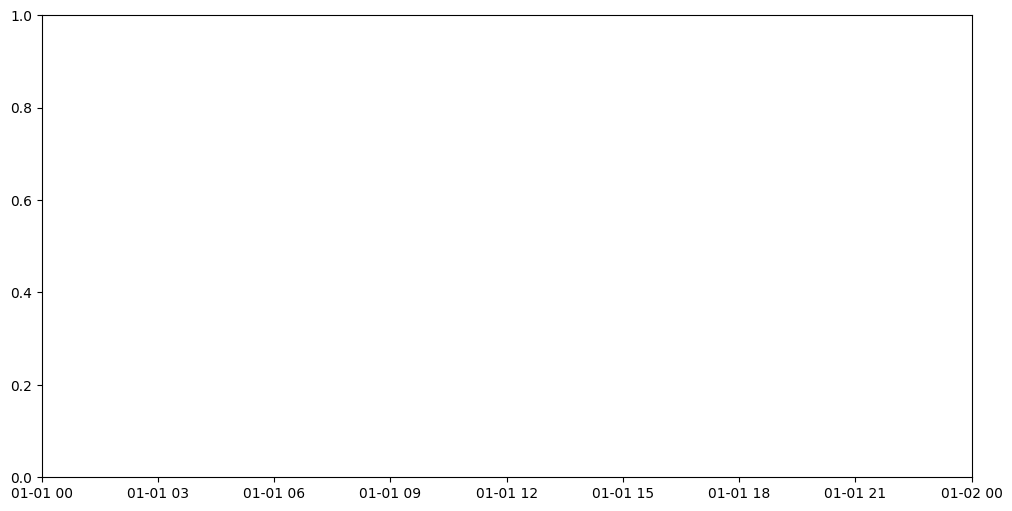

In [16]:
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Get historical data
data = yf.download('SPY', start='2010-01-01', end='2023-06-26')

# Calculate the 150-day and 50-day exponential moving averages
data['EMA_150'] = data['Close'].ewm(span=150).mean()
data['EMA_50'] = data['Close'].ewm(span=50).mean()

# Calculate the slope of the 150-day and 50-day exponential moving averages
for span, ema_col, slope_col in [(150, 'EMA_150', 'EMA_150_slope'), (50, 'EMA_50', 'EMA_50_slope')]:
    slopes = []
    for i in range(span-1, len(data)):
        y = data[ema_col].iloc[i-span+1:i+1].values.reshape(-1, 1)
        x = np.array(range(span)).reshape(-1, 1)
        reg = LinearRegression().fit(x, y)
        slopes.append(reg.coef_[0][0])
    data.loc[data.index[span-1:], slope_col] = slopes

# Implement the strategy for 150-day and 50-day EMA
portfolio_values = {150: [], 50: []}

for span in [150, 50]:
    capital = 100000
    cash = capital
    position = 0
    slope_col = f'EMA_{span}_slope'
    
    for i in range(span, len(data)):
        if data[slope_col].iloc[i-1] > 0:
            # Buy SPY with all available cash
            position += cash / data['Close'].iloc[i]
            cash = 0
        elif data[slope_col].iloc[i-1] < 0 and position > 0:
            # Sell all positions and hold cash
            cash += position * data['Close'].iloc[i]
            position = 0
        portfolio_values[span].append(cash + position * data['Close'].iloc[i])

# Calculate and plot the returns
data = data.iloc[50:]
data['Strategy_Returns_150'] = [np.nan]*100 + portfolio_values[150]
data['Strategy_Returns_50'] = portfolio_values[50]
data['Benchmark_Returns'] = data['Close'].pct_change() + 1

cumulative_strategy_returns_150 = data['Strategy_Returns_150'].dropna().cumprod()
cumulative_strategy_returns_50 = data['Strategy_Returns_50'].dropna().cumprod()
cumulative_benchmark_returns = data['Benchmark_Returns'].cumprod()

plt.figure(figsize=(12, 6))
plt.plot(data.index, cumulative_strategy_returns_150, label='Strategy Returns (150-day EMA)')
plt.plot(data.index, cumulative_strategy_returns_50, label='Strategy Returns (50-day EMA)')
plt.plot(data.index, cumulative_benchmark_returns, label='Benchmark Returns (SPY)')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.title('Strategy (150-day EMA vs 50-day EMA) vs Benchmark Cumulative Returns')
plt.grid()
plt.show()
